In [ ]:
 # Importing the drive module from google.colab package
from google.colab import drive
# Mounting the Google Drive to access files
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Importing the drive module again
from google.colab import drive
# Mounting the Google Drive again
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Displaying the current working directory
! pwd

/content


In [ ]:
# Listing the files in the specified directory
!ls /content/drive/MyDrive/Data.csv

/content/drive/MyDrive/Data.csv


In [ ]:
# Importing the pandas library as pd
import pandas as pd

 # Reading the CSV file into a DataFrame named df
data = pd.read_csv("/content/drive/MyDrive/Data.csv")

# Displaying the first few rows of the DataFrame
data.head()

,KEY,FREQ,REF_AREA,COUNT_AREA,TYP_TRNSCTN,RL_TRNSCTN,FRD_TYP,TRANSFORMATION,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,OBS_STATUS,CONF_STATUS,TIME_FORMAT,TIME_PER_COLLECT,DECIMALS,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
0,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,N,PN,2014,0.242,A,F,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6
1,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,N,PN,2015,0.268,A,F,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6
2,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,N,PN,2016,0.689,A,F,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6
3,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,N,PN,2017,0.632,A,F,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6
4,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,N,PN,2018,0.615,A,F,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6


In [ ]:
# Displaying the column names of the DataFrame
data.columns

Index(['KEY', 'FREQ', 'REF_AREA', 'COUNT_AREA', 'TYP_TRNSCTN', 'RL_TRNSCTN',
       'FRD_TYP', 'TRANSFORMATION', 'UNIT_MEASURE', 'TIME_PERIOD', 'OBS_VALUE',
       'OBS_STATUS', 'CONF_STATUS', 'TIME_FORMAT', 'TIME_PER_COLLECT',
       'DECIMALS', 'TITLE', 'TITLE_COMPL', 'UNIT', 'UNIT_MULT'],
      dtype='object')

#Pre-Processing

In [ ]:
# Calculating the number of missing values in each column of the DataFrame
data.isnull().sum()

KEY                     0
FREQ                    0
REF_AREA                0
COUNT_AREA              0
TYP_TRNSCTN             0
RL_TRNSCTN              0
FRD_TYP                 0
TRANSFORMATION          0
UNIT_MEASURE            0
TIME_PERIOD             0
OBS_VALUE           43058
OBS_STATUS              0
CONF_STATUS             0
TIME_FORMAT             0
TIME_PER_COLLECT        0
DECIMALS                0
TITLE                   0
TITLE_COMPL             0
UNIT                    0
UNIT_MULT               0
dtype: int64

In [ ]:
# Displaying the data types of each column in the DataFrame
data.dtypes

KEY                  object
FREQ                 object
REF_AREA             object
COUNT_AREA           object
TYP_TRNSCTN          object
RL_TRNSCTN           object
FRD_TYP              object
TRANSFORMATION       object
UNIT_MEASURE         object
TIME_PERIOD          object
OBS_VALUE           float64
OBS_STATUS           object
CONF_STATUS          object
TIME_FORMAT          object
TIME_PER_COLLECT     object
DECIMALS              int64
TITLE                object
TITLE_COMPL          object
UNIT                 object
UNIT_MULT             int64
dtype: object

In [ ]:
#Imputation method to handle missing values
# Calculating the mean of the 'OBS_VALUE' column
cal_mean= data['OBS_VALUE'].mean()

# Filling missing values in the 'OBS_VALUE' column with the mean
data['OBS_VALUE'] = data['OBS_VALUE'].fillna(cal_mean)

In [ ]:
# Calculating the number of missing values in each column of the DataFrame after filling missing values
data.isnull().sum()

KEY                 0
FREQ                0
REF_AREA            0
COUNT_AREA          0
TYP_TRNSCTN         0
RL_TRNSCTN          0
FRD_TYP             0
TRANSFORMATION      0
UNIT_MEASURE        0
TIME_PERIOD         0
OBS_VALUE           0
OBS_STATUS          0
CONF_STATUS         0
TIME_FORMAT         0
TIME_PER_COLLECT    0
DECIMALS            0
TITLE               0
TITLE_COMPL         0
UNIT                0
UNIT_MULT           0
dtype: int64

In [ ]:
# Droping the 'FREQ' column (As this column is not necessary for our analysis)
data.drop(columns=['FREQ'], inplace=True)


Exploratory Data Analysis

In [ ]:
# Summary statistics for numeric variables
numeric_summary = data.describe()
print(numeric_summary)


          OBS_VALUE  DECIMALS      UNIT_MULT
count  2.661990e+05  266199.0  266199.000000
mean   8.325763e+05       3.0       3.704304
std    2.044859e+07       0.0       2.916160
min   -1.000000e+02       3.0       0.000000
25%    2.302290e-02       3.0       0.000000
50%    1.317291e+01       3.0       6.000000
75%    8.096044e+03       3.0       6.000000
max    2.351327e+09       3.0       6.000000


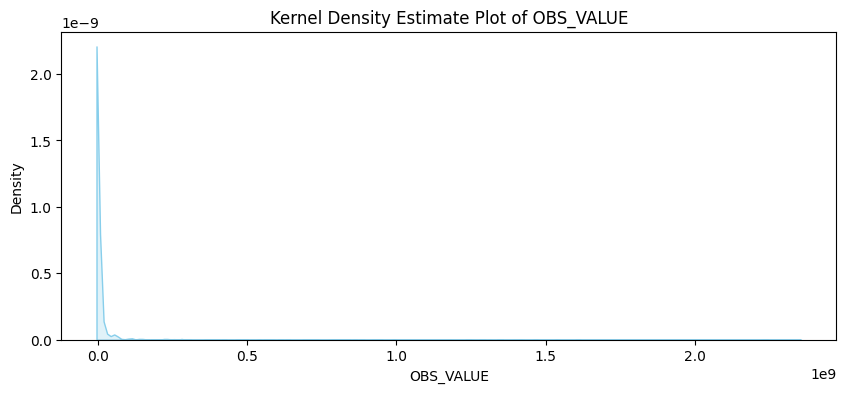

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot for OBS_VALUE
plt.figure(figsize=(10, 4))
sns.kdeplot(data['OBS_VALUE'], color='skyblue', fill=True)
plt.xlabel('OBS_VALUE')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot of OBS_VALUE')
plt.show()



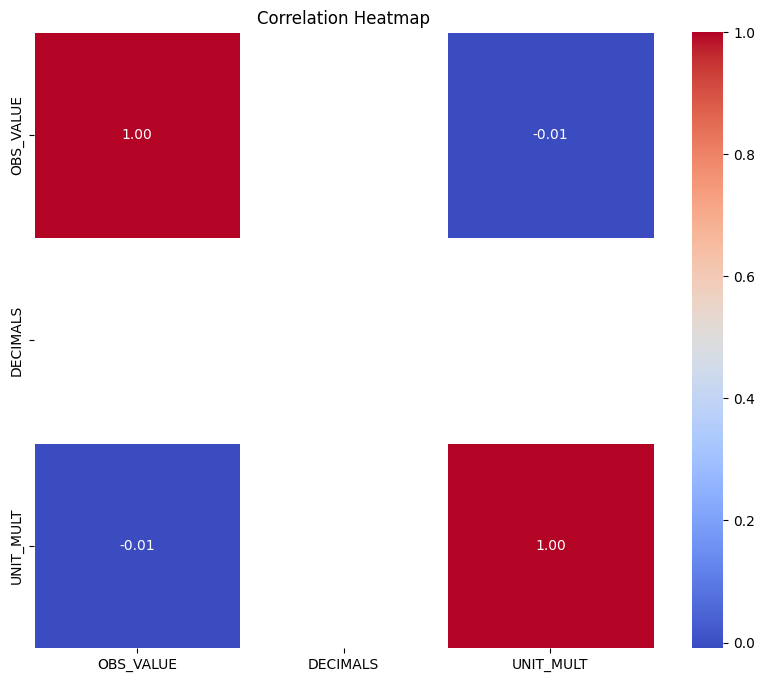

In [ ]:
import seaborn as sns
# Exclude non-numeric columns from correlation analysis
num_col = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[num_col].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

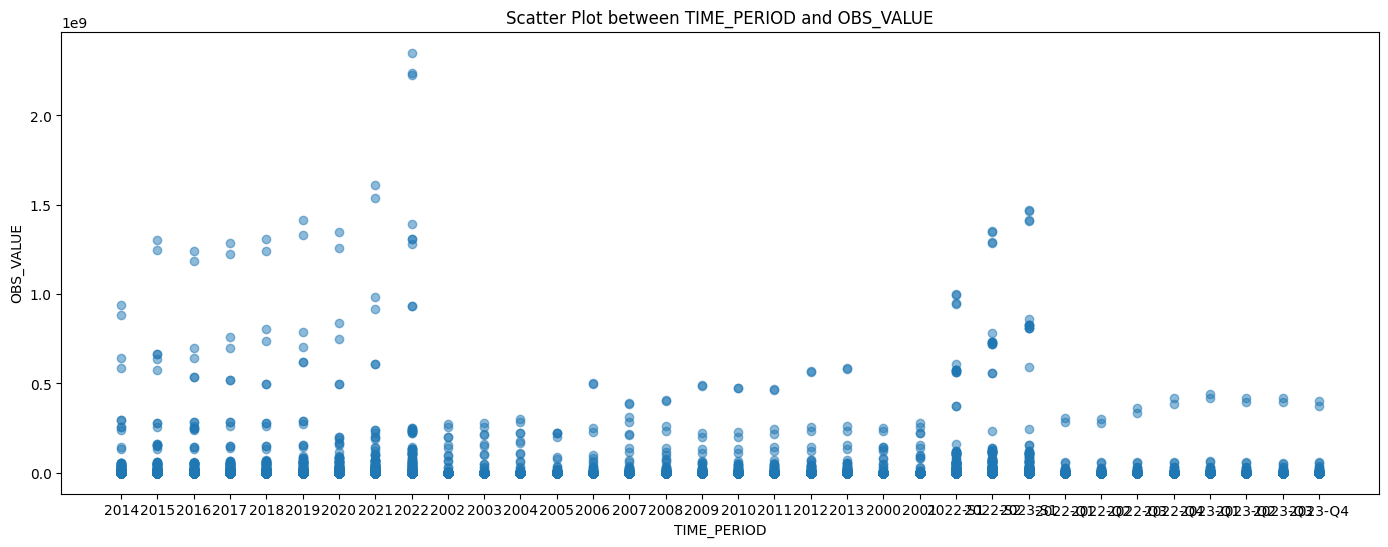

In [ ]:
# Scatter plot between OBS_VALUE and TIME_PERIOD
plt.figure(figsize=(17, 6))  # Increase the width of the figure
plt.scatter(data['TIME_PERIOD'], data['OBS_VALUE'], alpha=0.5)
plt.xlabel('TIME_PERIOD')
plt.ylabel('OBS_VALUE')
plt.title('Scatter Plot between TIME_PERIOD and OBS_VALUE')
plt.show()

In [ ]:
from scipy import stats

# Calculating Z-scores for 'OBS_VALUE'
z_Score = stats.zscore(data['OBS_VALUE'])

# Defining a threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Identifing outliers based on the threshold
outliers_cal = (z_Score > threshold) | (z_Score < -threshold)

# Removing outliers from the DataFrame
data = data[~outliers_cal]
print("Shape of cleaned DataFrame after removing outliers:", data.shape)


Shape of cleaned DataFrame after removing outliers: (265764, 19)


In [ ]:
# Creating Interaction Terms:
#Interaction between 'TYP_TRNSCTN' and 'REF_AREA'
data['Transaction_Location'] = data['TYP_TRNSCTN'] + '_' + data['REF_AREA']

# Deriving New Features:
#  Calculate the total transaction count for each transaction type
tran_count = data.groupby('TYP_TRNSCTN')['OBS_VALUE'].count().reset_index()
tran_count.rename(columns={'OBS_VALUE': 'Transaction_Count'}, inplace=True)

# Merging the transaction counts back to the original DataFrame
data = data.merge(tran_count, on='TYP_TRNSCTN', how='left')

# Calculating the average transaction amount for each transaction type
avg_tran_amount = data.groupby('TYP_TRNSCTN')['OBS_VALUE'].mean().reset_index()
avg_tran_amount.rename(columns={'OBS_VALUE': 'Avg_Transaction_Amount'}, inplace=True)

# Merging the average transaction amounts back to the original DataFrame
data = data.merge(avg_tran_amount, on='TYP_TRNSCTN', how='left')

data.head()


<ipython-input-18-356c8fec7eec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transaction_Location'] = data['TYP_TRNSCTN'] + '_' + data['REF_AREA']


,KEY,REF_AREA,COUNT_AREA,TYP_TRNSCTN,RL_TRNSCTN,FRD_TYP,TRANSFORMATION,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,...,TIME_FORMAT,TIME_PER_COLLECT,DECIMALS,TITLE,TITLE_COMPL,UNIT,UNIT_MULT,Transaction_Location,Transaction_Count,Avg_Transaction_Amount
0,PAY.A.AT.BG.TOTL.1._Z.N.PN,AT,BG,TOTL,1,_Z,N,PN,2014,0.242,...,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6,TOTL_AT,21314,343227.72857
1,PAY.A.AT.BG.TOTL.1._Z.N.PN,AT,BG,TOTL,1,_Z,N,PN,2015,0.268,...,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6,TOTL_AT,21314,343227.72857
2,PAY.A.AT.BG.TOTL.1._Z.N.PN,AT,BG,TOTL,1,_Z,N,PN,2016,0.689,...,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6,TOTL_AT,21314,343227.72857
3,PAY.A.AT.BG.TOTL.1._Z.N.PN,AT,BG,TOTL,1,_Z,N,PN,2017,0.632,...,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6,TOTL_AT,21314,343227.72857
4,PAY.A.AT.BG.TOTL.1._Z.N.PN,AT,BG,TOTL,1,_Z,N,PN,2018,0.615,...,P1Y,S,3,Number of Total payment transactions [sum of C...,Number of Total payment transactions [sum of C...,PN,6,TOTL_AT,21314,343227.72857



#Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
data.dropna(inplace=True)

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Defining features (X) and target variable (y)
X = data.drop(columns=['OBS_VALUE'])
y = data['OBS_VALUE']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model1 = LinearRegression()

# Training the model on the training data
model1.fit(X_train, y_train)

# Predicting the target variable on the testing data
y_predict = model1.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error (MSE) on Test Set:", mse)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)
print("R-squared (R2) Score on Test Set:", r2)


Mean Squared Error (MSE) on Test Set: 3221902667126.943
Root Mean Squared Error (RMSE) on Test Set: 1794965.923667339
R-squared (R2) Score on Test Set: 0.03773525779014819


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Droping rows with missing values
data.dropna(inplace=True)

# Label encode categorical columns
label_encoder = LabelEncoder()
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Define features (X) and target variable (y)
X = data.drop(columns=['OBS_VALUE'])
y = data['OBS_VALUE']  # Target variable

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor model
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training data
model2.fit(X_train, y_train)

# Predict the target variable on the testing data
y_predict2 = model2.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_predict2)
rmse = mean_squared_error(y_test, y_predict2, squared=False)
r2 = r2_score(y_test, y_predict2)

print("Mean Squared Error (MSE) on Test Set:", mse)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)
print("R-squared (R2) Score on Test Set:", r2)


Mean Squared Error (MSE) on Test Set: 255802717359.91684
Root Mean Squared Error (RMSE) on Test Set: 505769.43102555815
R-squared (R2) Score on Test Set: 0.9236010639339336


#Feature Importance Analysis:

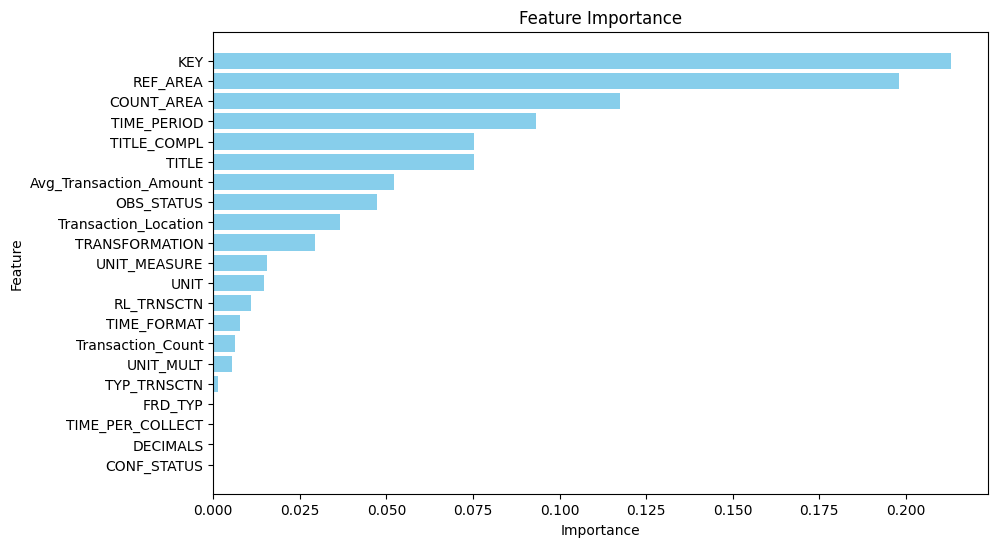

In [ ]:
import matplotlib.pyplot as plt

# Geting feature importances from the trained model
imp_features = model2.feature_importances_

# Geting feature names
feature_names = X.columns

# Creating a DataFrame to store feature importances
imp_features_df = pd.DataFrame({'Feature': feature_names, 'Importance': imp_features})

# Sorting the DataFrame by feature importance in descending order
imp_features_df = imp_features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(imp_features_df['Feature'], imp_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Selecting top transaction attributes based on feature importance
top_attributes = imp_features_df['Feature'].head(10).tolist()

# Defining privacy risk metrics based on required conditions
privacy_risk_metrics = ['Data Sensitivity', 'Exposure of Personal Information', 'Compliance with Privacy Regulations']

# Assessing correlation between top attributes and privacy risk metrics
attribute_correlation = data[top_attributes].corrwith(data['OBS_VALUE'])

# Normalizing attribute correlations to range [0, 1]
normalized_correlation = (attribute_correlation - attribute_correlation.min()) / (attribute_correlation.max() - attribute_correlation.min())

# Defining weights for privacy risk metrics based on importance
privacy_risk_weights = [0.4, 0.3, 0.3]

# Calculating privacy risk scores for each attribute
privacy_risk_scores = {}
for attribute in top_attributes:
    attribute_corr = data[attribute].corr(data['OBS_VALUE'])
    privacy_risk_score = attribute_corr * pd.Series(privacy_risk_weights)
    privacy_risk_scores[attribute] = privacy_risk_score

# Print privacy risk scores for each attribute
for attribute, score in privacy_risk_scores.items():
    print(f"Privacy Risk Score for {attribute}: {score.sum()}")



Privacy Risk Score for KEY: 0.011409794363678984
Privacy Risk Score for REF_AREA: -0.020977737782042493
Privacy Risk Score for COUNT_AREA: 0.06903049497902711
Privacy Risk Score for TIME_PERIOD: -0.015565264117013753
Privacy Risk Score for TITLE_COMPL: 0.09167201316095273
Privacy Risk Score for TITLE: 0.09167201316095273
Privacy Risk Score for Avg_Transaction_Amount: 0.10277077727700498
Privacy Risk Score for OBS_STATUS: 0.11462285824177948
Privacy Risk Score for Transaction_Location: 0.03297203004364042
Privacy Risk Score for TRANSFORMATION: 0.004839805679568472


#Risk Stratification:


In [ ]:
# Defining risk score thresholds for risk stratification
low_threshold_val = 0.01
medium_threshold_val = 0.03

# Functioning to stratify privacy risk scores
def stratify_risk(score):
    if score < low_threshold_val:
        return 'Low'
    elif score < medium_threshold_val:
        return 'Medium'
    else:
        return 'High'

# Calculating privacy risk scores for each attribute
privacy_risk_scores = {
    'KEY': 0.011409794363678984,
    'REF_AREA': -0.020977737782042493,
    'COUNT_AREA': 0.06903049497902711,
    'TIME_PERIOD': -0.015565264117013753,
    'TITLE_COMPL': 0.09167201316095273,
    'TITLE': 0.09167201316095273,
    'Avg_Transaction_Amount': 0.10277077727700498,
    'OBS_STATUS': 0.11462285824177948,
    'Transaction_Location': 0.03297203004364042,
    'TRANSFORMATION': 0.004839805679568472
}

# Stratifying privacy risk scores
stratified_risk_scores = {attribute: stratify_risk(score) for attribute, score in privacy_risk_scores.items()}

# Print the stratified risk scores
for attribute, risk_level in stratified_risk_scores.items():
    print(f"Privacy Risk Level for {attribute}: {risk_level}")


Privacy Risk Level for KEY: Medium
Privacy Risk Level for REF_AREA: Low
Privacy Risk Level for COUNT_AREA: High
Privacy Risk Level for TIME_PERIOD: Low
Privacy Risk Level for TITLE_COMPL: High
Privacy Risk Level for TITLE: High
Privacy Risk Level for Avg_Transaction_Amount: High
Privacy Risk Level for OBS_STATUS: High
Privacy Risk Level for Transaction_Location: High
Privacy Risk Level for TRANSFORMATION: Low


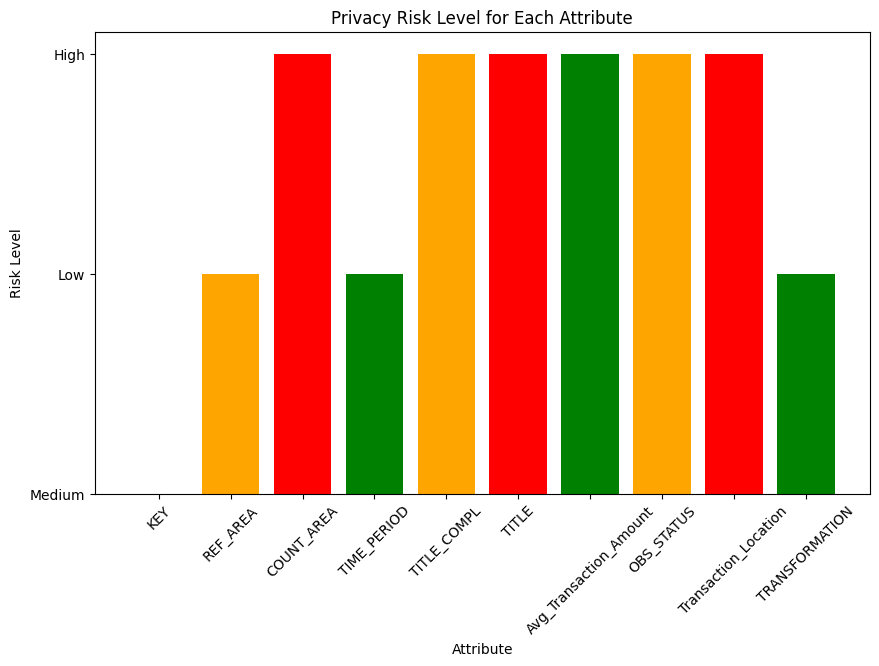

In [ ]:
import matplotlib.pyplot as plt

# Converting the stratified risk scores dictionary to lists for plotting
attribute_vari = list(stratified_risk_scores.keys())
risk_levels_lst = list(stratified_risk_scores.values())

# Creating a bar plot for each attribute
plt.figure(figsize=(10, 6))
plt.bar(attribute_vari, risk_levels_lst, color=['green', 'orange', 'red'])
plt.xlabel('Attribute')
plt.ylabel('Risk Level')
plt.title('Privacy Risk Level for Each Attribute')
plt.xticks(rotation=45)
plt.show()




#Risk Aggregation:


In [ ]:
# Defining weights for each attribute (assuming equal weights for simplicity)
attribute_weights = {
    'KEY':1,
    'REF_AREA': 1,
    'COUNT_AREA': 1,
    'TIME_PERIOD': 1,
    'TITLE_COMPL': 1,
    'TITLE': 1,
    'Avg_Transaction_Amount': 1,
    'OBS_STATUS':1,
    'Transaction_Location': 1,
    'TRANSFORMATION': 1
}

# Functioning to aggregate privacy risk scores for each transaction
def aggregate_risk_scores(risk_scores, weights):
    total_weight = sum(weights.values())
    weighted_sum = sum(score * weights[attribute] for attribute, score in risk_scores.items())
    aggregated_score = weighted_sum / total_weight
    return aggregated_score

# Converting privacy risk levels to numerical values (for aggregation)
privacy_risk_levels = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Aggregating privacy risk scores for each transaction
privacy_risk_scores = {
    'KEY': privacy_risk_levels['Medium'],
    'REF_AREA': privacy_risk_levels['Low'],
    'COUNT_AREA': privacy_risk_levels['High'],
    'TIME_PERIOD': privacy_risk_levels['Low'],
    'TITLE_COMPL': privacy_risk_levels['High'],
    'TITLE': privacy_risk_levels['High'],
    'Avg_Transaction_Amount': privacy_risk_levels['High'],
    'OBS_STATUS': privacy_risk_levels['High'],
    'Transaction_Location': privacy_risk_levels['High'],
    'TRANSFORMATION': privacy_risk_levels['Low']
}

# Reversing the privacy risk levels dictionary for mapping later
reversing_privacy_risk_levels = {v: k for k, v in privacy_risk_levels.items()}

# Aggregate the privacy risk scores using weights
overall_risk_score = aggregate_risk_scores(privacy_risk_scores, attribute_weights)

# Mapping the aggregated score to privacy risk levels
overall_risk_level = reversing_privacy_risk_levels[int(overall_risk_score)]

print("Overall Privacy Risk Level for the Transaction:", overall_risk_level)


Overall Privacy Risk Level for the Transaction: Medium
